In [ ]:
# Figure 5, synthesis manuscript

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import glob as glob
import numpy as np

In [6]:
colors = pd.read_csv(
    'TMP_cohort_colors_n26.csv',
    sep = ',', index_col = 0)

In [8]:
def rmsd(predictions, targets):
    return np.sqrt(np.mean((predictions - targets) ** 2))

In [9]:
feat_set = 'production_17k_to_5k'
feature_label = 'features 17k to 5k'
input_path = 'features_17k_to_5k'
suffix = '17k_to_5k'

In [10]:
c_paths = sorted(glob.glob('i_o/'+feat_set+'/*'))

In [11]:
stor_in_pths = glob.glob('i_o/RMSD/*.tsv')

In [ ]:
for c_path in c_paths:
    
    c = c_path.split('/')[-1]
    dec_pths = sorted(glob.glob('/Users/karlberb/Documents/work/sample_count/synthetic_TCGA_data_gen/h_production/i_o/'+feat_set+'/'+c+'/decoded_objs/*'))
    syn_pths = sorted(glob.glob('/Users/karlberb/Documents/work/sample_count/synthetic_TCGA_data_gen/h_production/i_o/'+feat_set+'/'+c+'/synthetic_sample_sets/*'))
    
    stor_fram = pd.DataFrame(columns = ['sub_typ', 'rmsd', 'replicate'])

    for pi, pth in enumerate(dec_pths):
        stats_frame = pd.DataFrame(columns = ['sub_typ', 'rmsd', 'replicate'])
        dec = pd.read_csv(pth, sep = '\t', index_col = 0)
        dec_ndx = dec.index
        inp = pd.read_csv('/Users/karlberb/Documents/work/sample_count/synthetic_TCGA_data_gen/h_production/i_o/'+input_path+'/'+c+'_from_'+suffix+'.tsv',
                            sep = '\t', index_col = 0)
        i40 = inp.loc[dec_ndx]
        
        rmsd_values = [rmsd(i40.iloc[i][1:], dec.iloc[i][1:]) for i in range(len(i40))]
        syn = pd.read_csv(syn_pths[pi], sep = '\t', index_col = 0)

        stats_frame = stats_frame.assign(sub_typ = i40.Labels)
        stats_frame = stats_frame.assign(rmsd = rmsd_values)
        stats_frame = stats_frame.assign(replicate = pi)
        
        stor_fram = pd.concat([stor_fram, stats_frame])
    stor_fram.to_csv('RMSD/'+c+'_'+suffix+'.tsv', sep = '\t')

In [16]:
big_frame = pd.DataFrame(columns = ['sub_typ', 'rmsd', 'replicate'])
for in_pth in stor_in_pths:
    stor_in = pd.read_csv(in_pth, sep = '\t', index_col = 0)
    big_frame = pd.concat([big_frame, stor_in])

In [17]:
big_prime = pd.DataFrame(columns = ['sub_typ', 'rmsd', 'replicate', 'primary'])
for j,c in enumerate(set([i.split('_')[0] for i in big_frame.sub_typ.unique()])):
    prime_frame = big_frame[big_frame.sub_typ.str.contains(c)].copy()
    prime_frame['primary'] = c
    prime_frame['average'] = prime_frame.rmsd.mean()    
    big_prime = pd.concat([big_prime, prime_frame])

In [18]:
big_prime.sort_values(by = 'average', inplace = True)    

In [19]:
c_lst = [big_prime.primary.unique()]

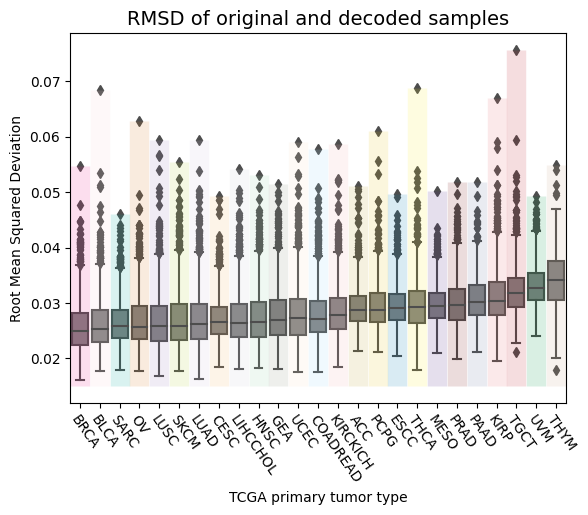

In [28]:
ax = sns.boxplot(x='primary', y='rmsd', data=big_prime, color = 'grey')
ax.set_xticklabels(ax.get_xticklabels(),rotation=-55,
                   ha='left', rotation_mode='anchor')
for x in list(range(0,25)):
    c = c_lst[x]

    plt.vlines(x = x, ymin = .015, ymax = a_lst[x],
           colors = colors.loc[c,' 2021-04-14: TMP cohort colors'],
               alpha = .15, linewidth = 14)
ax.set_title('RMSD of original and decoded samples',
            fontsize = 14)
ax.set_xlabel('TCGA primary tumor type')
ax.set_ylabel('Root Mean Squared Deviation')
ax.get_figure().savefig('Fig_5.pdf', dpi = 300, bbox_inches = 'tight')